In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing & Cleaning Data

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

In [43]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

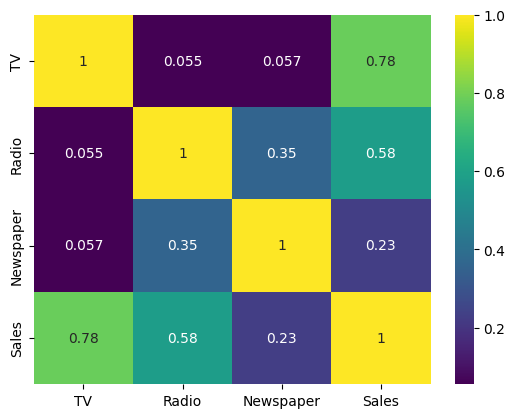

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='viridis',)

The above heatmap shows a strong correlation between sales and TV advertisement

In [21]:
tvep = df['TV'].sum()
rdep = df['Radio'].sum()
npep = df['Newspaper'].sum()
print("Total Expence on TV Advertisement is :- ",tvep)
print("Total Expence on Radio Advertisement is :- ",rdep)
print("Total Expence on Newspaper Advertisement is :- ",npep)

Total Expence on TV Advertisement is :-  29408.5
Total Expence on Radio Advertisement is :-  4652.800000000001
Total Expence on Newspaper Advertisement is :-  6110.799999999999


<Axes: >

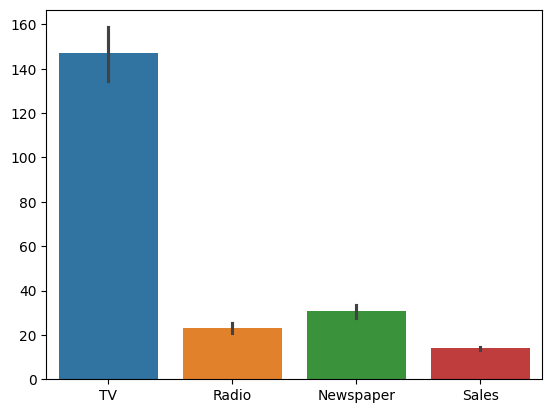

In [23]:
sns.barplot(data=df)

The Above Graph shows that the highest amount is spent on TV Advertising

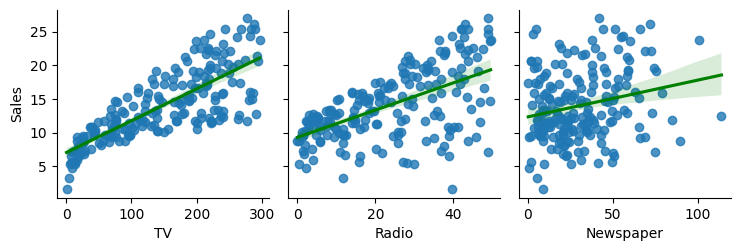

In [24]:
x_vars = ["TV", "Radio", "Newspaper"]
y_var = "Sales"

sns.pairplot(df, x_vars=x_vars, y_vars=y_var, kind="reg",plot_kws={'line_kws':{'color':'green'}})
plt.show()

From the above pairplot we can observe that there is strong correlation between TV Ads & Radio Ads with Sales and weaker correlation between Newspaper Ads and sales

# Machine Learning Model

In [25]:
X=df.drop(columns="Sales",axis=1)
Y=df["Sales"]

In [26]:
X.shape

(200, 3)

In [27]:
Y.shape

(200,)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

In [31]:
std=StandardScaler()

In [32]:
x_trainscaler=std.fit_transform(x_train)
x_testscaler=std.fit_transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [34]:
lr=LinearRegression()

In [35]:
lr.fit(x_trainscaler,y_train)
y_pred=lr.predict(x_testscaler)

In [36]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [37]:
print("Mean Squared Error:",mse)
print("r-squared:",r2)

Mean Squared Error: 5.408913759032387
r-squared: 0.8281217233452883


In [40]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4820534519182238
5.408913759032387
2.3257071524661885


In [42]:
metrics.explained_variance_score(y_test,y_pred)

0.8583295976106223

# Accuracy = 85.8%